In [ ]:
# Step 1: Install Required Libraries
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Step 2: Import Necessary Libraries
from roboflow import Roboflow
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="U8vh71GYTWhnA8RzlAWA")
project = rf.workspace("roboflow-100").project("csgo-videogame")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSGO-videogame-2 in yolov8:: 100%|██████████| 4866/4866 [00:00<00:00, 6479.77it/s]


In [ ]:
# Step 4: Verify Dataset Path
# Roboflow typically downloads datasets to a specific directory
# The exact path might look like: /content/csgo-videogame-2/
print(f"Dataset downloaded to: {dataset.location}")

Dataset downloaded to: /content/CSGO-videogame-2


In [ ]:
# Step 5: Configure Training Parameters
model = YOLO('yolov8n.pt')  # Start with a pre-trained nano model
results = model.train(
    data=f'{dataset.location}/data.yaml',  # Path to dataset configuration
    epochs=70,             # Number of training epochs
    imgsz=640,              # Image size
    batch=18,               # Batch size
    device=0,               # GPU training (assumes CUDA is available)
    save=True,              # Save model after training
    project='csgo_detection', # Project save directory
    name='trained_model'    # Specific run name
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/CSGO-videogame-2/data.yaml, epochs=70, time=None, patience=100, batch=18, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=csgo_detection, name=trained_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


AMP: checks passed ✅


train: Scanning /content/CSGO-videogame-2/train/labels... 1774 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1774/1774 [00:00<00:00, 2086.16it/s]

train: New cache created: /content/CSGO-videogame-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/CSGO-videogame-2/valid/labels... 446 images, 2 backgrounds, 0 corrupt: 100%|██████████| 446/446 [00:00<00:00, 634.98it/s]


val: New cache created: /content/CSGO-videogame-2/valid/labels.cache
Plotting labels to csgo_detection/trained_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to csgo_detection/trained_model
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      2.48G      1.594      2.646      1.287         21        640: 100%|██████████| 99/99 [00:40<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]

                   all        446        564      0.671      0.501      0.583      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      2.34G      1.609      1.881      1.353         21        640: 100%|██████████| 99/99 [00:36<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]


                   all        446        564      0.625      0.479      0.521      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      2.34G      1.633      1.589      1.366         15        640: 100%|██████████| 99/99 [00:36<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        446        564      0.703      0.697      0.714      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      2.34G      1.587      1.375       1.35         27        640: 100%|██████████| 99/99 [00:38<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]


                   all        446        564      0.709      0.524      0.616      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      2.34G      1.559      1.228      1.329         15        640: 100%|██████████| 99/99 [00:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]


                   all        446        564      0.816      0.599      0.708       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      2.33G      1.537       1.15       1.32         20        640: 100%|██████████| 99/99 [00:36<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        446        564      0.788      0.759      0.809      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      2.34G      1.523      1.115      1.333         13        640: 100%|██████████| 99/99 [00:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        446        564      0.788      0.721      0.791      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      2.33G      1.503      1.063      1.315         23        640: 100%|██████████| 99/99 [00:36<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]

                   all        446        564      0.877      0.808      0.874      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      2.33G      1.494      1.018      1.289         19        640: 100%|██████████| 99/99 [00:36<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]


                   all        446        564      0.855      0.841      0.877      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      2.32G      1.443     0.9765      1.257         25        640: 100%|██████████| 99/99 [00:36<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]

                   all        446        564      0.909      0.829      0.899      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      2.33G      1.486     0.9879      1.288         21        640: 100%|██████████| 99/99 [00:36<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        446        564      0.886      0.844      0.889      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      2.34G      1.462     0.9804      1.275         14        640: 100%|██████████| 99/99 [00:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]

                   all        446        564       0.89      0.818      0.893      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      2.33G      1.484     0.9687      1.292         20        640: 100%|██████████| 99/99 [00:36<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]


                   all        446        564      0.904      0.809      0.903      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      2.33G       1.42     0.9284      1.264         18        640: 100%|██████████| 99/99 [00:35<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]


                   all        446        564      0.871      0.834      0.897      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      2.33G      1.418     0.8906      1.259         17        640: 100%|██████████| 99/99 [00:36<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]

                   all        446        564       0.92      0.861      0.924      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      2.33G       1.38       0.89      1.244         29        640: 100%|██████████| 99/99 [00:36<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]

                   all        446        564      0.917       0.84      0.914      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      2.33G      1.395     0.8852      1.256         17        640: 100%|██████████| 99/99 [00:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]

                   all        446        564      0.911      0.881      0.926       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      2.32G      1.391     0.8618       1.25         29        640: 100%|██████████| 99/99 [00:36<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]

                   all        446        564      0.924      0.867      0.922      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      2.33G      1.392     0.8552      1.239         21        640: 100%|██████████| 99/99 [00:35<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]

                   all        446        564      0.924      0.851      0.918      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      2.33G      1.356     0.8349      1.213         22        640: 100%|██████████| 99/99 [00:36<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]

                   all        446        564      0.939       0.89       0.94      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      2.33G      1.371     0.8261      1.224         27        640: 100%|██████████| 99/99 [00:35<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        446        564      0.923      0.874      0.919      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      2.32G      1.317     0.7959      1.202         11        640: 100%|██████████| 99/99 [00:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]

                   all        446        564      0.918      0.853       0.91      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      2.33G      1.351     0.8026      1.219         19        640: 100%|██████████| 99/99 [00:35<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.46it/s]

                   all        446        564      0.934      0.879       0.93      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      2.33G      1.303     0.7747      1.192         18        640: 100%|██████████| 99/99 [00:36<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        446        564      0.937       0.86      0.925       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      2.33G      1.337     0.7905      1.215         18        640: 100%|██████████| 99/99 [00:37<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        446        564      0.913      0.886      0.935      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      2.33G      1.323     0.7846      1.197         19        640: 100%|██████████| 99/99 [00:37<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]

                   all        446        564      0.907      0.905      0.929      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      2.33G      1.334     0.7816        1.2         33        640: 100%|██████████| 99/99 [00:36<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]

                   all        446        564      0.919      0.895      0.932      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      2.35G      1.271     0.7558      1.173         22        640: 100%|██████████| 99/99 [00:37<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]

                   all        446        564      0.934      0.914      0.939      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      2.33G      1.305     0.7648      1.186         26        640: 100%|██████████| 99/99 [00:36<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]

                   all        446        564      0.951      0.894       0.94      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      2.32G      1.285     0.7471      1.177         20        640: 100%|██████████| 99/99 [00:36<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        446        564      0.949        0.9      0.944      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      2.33G      1.254     0.7226      1.168         17        640: 100%|██████████| 99/99 [00:36<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]

                   all        446        564      0.933      0.898      0.939      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      2.34G      1.234     0.7151       1.16         16        640: 100%|██████████| 99/99 [00:36<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]

                   all        446        564      0.934      0.894      0.942      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      2.33G      1.258     0.7141      1.171         17        640: 100%|██████████| 99/99 [00:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]

                   all        446        564      0.961      0.904      0.948      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      2.32G       1.24     0.7141      1.155         18        640: 100%|██████████| 99/99 [00:36<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        446        564       0.94      0.909      0.952       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      2.33G      1.251     0.6961      1.172         22        640: 100%|██████████| 99/99 [00:37<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]


                   all        446        564      0.946      0.895      0.941      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      2.33G      1.247     0.6869      1.157         19        640: 100%|██████████| 99/99 [00:37<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]

                   all        446        564      0.943      0.916       0.95      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      2.34G      1.219     0.6757      1.141         16        640: 100%|██████████| 99/99 [00:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]

                   all        446        564      0.967      0.918      0.956      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      2.33G      1.204     0.6741      1.136         18        640: 100%|██████████| 99/99 [00:37<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]

                   all        446        564      0.939      0.923      0.956      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      2.33G      1.202     0.6545      1.129         19        640: 100%|██████████| 99/99 [00:37<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        446        564      0.941      0.908      0.959       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      2.33G      1.195     0.6618      1.132         22        640: 100%|██████████| 99/99 [00:37<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]

                   all        446        564      0.947      0.911       0.96      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      2.33G      1.199     0.6725      1.129         22        640: 100%|██████████| 99/99 [00:37<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        446        564      0.945      0.931      0.968      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      2.33G      1.205     0.6646      1.128         24        640: 100%|██████████| 99/99 [00:37<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]

                   all        446        564       0.94      0.913      0.959      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      2.33G      1.181     0.6529      1.116         20        640: 100%|██████████| 99/99 [00:36<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]

                   all        446        564       0.95      0.899      0.951      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      2.33G      1.172     0.6425      1.116         18        640: 100%|██████████| 99/99 [00:36<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]


                   all        446        564      0.956      0.924      0.961       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      2.33G      1.177     0.6605      1.115         18        640: 100%|██████████| 99/99 [00:37<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]

                   all        446        564      0.954      0.927      0.963      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      2.33G      1.177     0.6606       1.12         18        640: 100%|██████████| 99/99 [00:36<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]

                   all        446        564      0.947      0.941      0.964       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      2.33G      1.161     0.6343      1.118          9        640: 100%|██████████| 99/99 [00:36<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]

                   all        446        564      0.962      0.921      0.964      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      2.33G      1.138     0.6206      1.101         17        640: 100%|██████████| 99/99 [00:36<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]

                   all        446        564       0.96      0.927      0.963      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      2.33G      1.123     0.6102      1.094         18        640: 100%|██████████| 99/99 [00:37<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]

                   all        446        564       0.97      0.929      0.967       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      2.33G      1.119      0.607      1.092         24        640: 100%|██████████| 99/99 [00:37<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        446        564       0.96      0.925      0.958      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      2.33G      1.111     0.6162      1.094         19        640: 100%|██████████| 99/99 [00:37<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.25it/s]

                   all        446        564      0.953      0.938      0.961      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      2.33G      1.104     0.6047      1.087         20        640: 100%|██████████| 99/99 [00:37<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]

                   all        446        564      0.961      0.938      0.964      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      2.33G      1.086     0.5947      1.079         21        640: 100%|██████████| 99/99 [00:37<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]

                   all        446        564      0.962      0.939      0.963      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      2.33G       1.12     0.6175      1.091         18        640: 100%|██████████| 99/99 [00:35<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]

                   all        446        564      0.967      0.926      0.963      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      2.35G      1.069      0.584      1.072         24        640: 100%|██████████| 99/99 [00:36<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


                   all        446        564      0.943      0.942      0.961      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      2.33G       1.06     0.5764      1.068         23        640: 100%|██████████| 99/99 [00:36<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        446        564      0.954      0.937      0.963      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      2.33G      1.072     0.5776      1.068         21        640: 100%|██████████| 99/99 [00:37<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]

                   all        446        564      0.965      0.937      0.966      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      2.32G      1.076     0.5853      1.076         19        640: 100%|██████████| 99/99 [00:37<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]

                   all        446        564      0.962      0.945      0.969      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      2.36G      1.053      0.576      1.061         18        640: 100%|██████████| 99/99 [00:37<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]

                   all        446        564      0.952      0.954      0.967      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      2.33G      1.046     0.5691      1.062         19        640: 100%|██████████| 99/99 [00:37<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]

                   all        446        564      0.962      0.945      0.967      0.655


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      2.33G     0.9972     0.4742      1.018         11        640: 100%|██████████| 99/99 [00:37<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]


                   all        446        564      0.965      0.943      0.971      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      2.33G     0.9663     0.4511      1.009         11        640: 100%|██████████| 99/99 [00:36<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]

                   all        446        564      0.954      0.952      0.968       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      2.33G     0.9563     0.4514      1.007         13        640: 100%|██████████| 99/99 [00:35<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]

                   all        446        564      0.957      0.941      0.966      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      2.33G     0.9434     0.4416          1         12        640: 100%|██████████| 99/99 [00:34<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        446        564      0.957      0.952      0.971      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      2.33G     0.9362      0.439     0.9944         13        640: 100%|██████████| 99/99 [00:36<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]

                   all        446        564      0.958      0.949      0.973      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      2.33G     0.9201     0.4236     0.9883         16        640: 100%|██████████| 99/99 [00:37<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        446        564      0.959       0.95       0.97      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      2.33G     0.9253     0.4335     0.9888         14        640: 100%|██████████| 99/99 [00:35<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]

                   all        446        564      0.956      0.952       0.97      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      2.34G     0.9053     0.4246     0.9825         16        640: 100%|██████████| 99/99 [00:34<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]

                   all        446        564      0.967       0.95      0.971      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      2.33G     0.8955     0.4236     0.9779         13        640: 100%|██████████| 99/99 [00:35<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]

                   all        446        564      0.975      0.939       0.97      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      2.33G     0.8993     0.4207     0.9886         11        640: 100%|██████████| 99/99 [00:35<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]

                   all        446        564      0.968       0.95      0.971      0.678



70 epochs completed in 0.832 hours.
Optimizer stripped from csgo_detection/trained_model/weights/last.pt, 6.3MB
Optimizer stripped from csgo_detection/trained_model/weights/best.pt, 6.3MB

Validating csgo_detection/trained_model/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]


                   all        446        564      0.968      0.945      0.971      0.679
                    CT        231        286      0.958      0.948      0.979      0.672
                     T        240        278      0.978      0.942      0.963      0.685
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to csgo_detection/trained_model


In [ ]:
# Step 6: Validate the Trained Model
results = model.val()

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/CSGO-videogame-2/valid/labels.cache... 446 images, 2 backgrounds, 0 corrupt: 100%|██████████| 446/446 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.00it/s]


                   all        446        564      0.965      0.951      0.971      0.677
                    CT        231        286      0.954      0.952      0.978      0.673
                     T        240        278      0.976       0.95      0.964      0.682
Speed: 0.4ms preprocess, 4.8ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to csgo_detection/trained_model2


In [ ]:
# Optional: Print out the path to the saved model
best_model_path = f"{model.trainer.save_dir}/weights/best.pt"
print(f"Best model saved at: {best_model_path}")

Best model saved at: csgo_detection/trained_model/weights/best.pt


In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the trained model
model = YOLO(best_model_path)  # Replace with your trained model path

def predict_image(image_path):
    """
    Predict objects in a single image and visualize results in Colab
    with different colored bounding boxes for different classes

    Args:
        image_path (str): Path to the input image
    """
    # Run prediction
    results = model.predict(source=image_path, conf=0.05, iou=0.5)

    # Read the image for visualization
    img = cv2.imread(image_path)

    # Color palette for different classes
    # You can customize these colors as needed
    colors = {
        'T': (0, 0, 255),      # Red for Counter-Terrorists
        'CT': (0, 255, 0)         # Green for Terrorists
    }

    # Process each detected object
    for result in results:
        # Extract bounding boxes, confidence, and class information
        boxes = result.boxes

        for box in boxes:
            # Extract coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Get confidence and class
            conf = box.conf[0]
            cls = box.cls[0]

            # Get class name
            class_name = model.names[int(cls)]

            # Choose color based on class name
            # Default to green if class not in predefined colors
            box_color = colors.get(class_name, (0, 255, 0))

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), box_color, 2)

            # Create label with class and confidence
            label = f'{class_name}: {conf:.2f}'

            # Put text on image
            cv2.putText(img, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)

    # Display image using Colab-specific method
    cv2_imshow(img)


image 1/1 /content/csgo11.jpg: 640x640 2 CTs, 12.0ms
Speed: 10.5ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


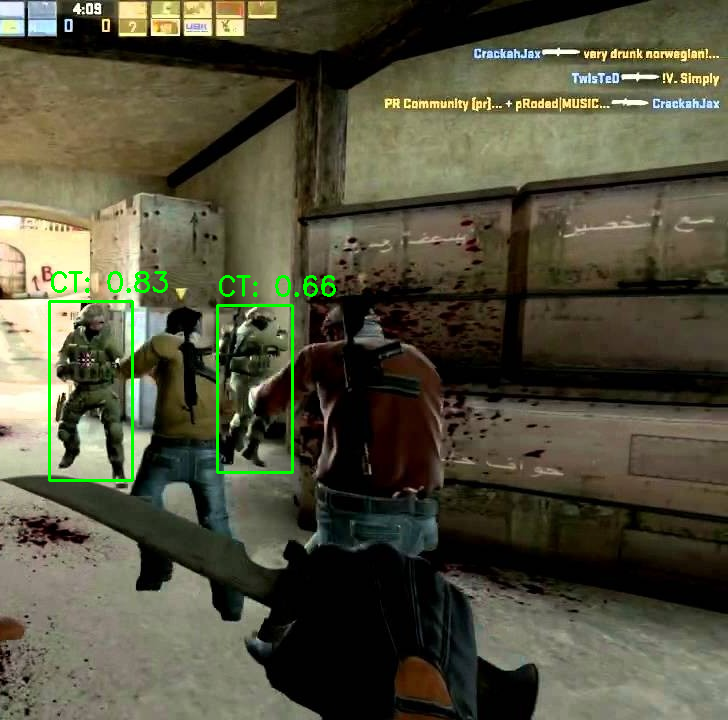

In [ ]:
# Example usage in Colab
predict_image('csgo11.jpg')  # Display prediction

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the trained model
model = YOLO(best_model_path)  # Replace with your trained model path

def predict_video(video_path, output_path='/content/predicted_video.mp4', display_frames=False):
    """
    Predict objects in a video and save annotated video

    Args:
        video_path (str): Path to input video
        output_path (str): Path to save annotated video
        display_frames (bool): Whether to display frames in Colab (can slow down processing)
    """
    # Open the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Progress tracking
    processed_frames = 0

    while cap.isOpened():
        # Read a frame
        ret, frame = cap.read()
        if not ret:
            break

        # Run prediction on the frame
        results = model(frame)

        # Process each detected object
        for result in results:
            boxes = result.boxes

            for box in boxes:
                # Extract coordinates
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                # Get confidence and class
                conf = box.conf[0]
                cls = box.cls[0]

                # Get class name
                class_name = model.names[int(cls)]

                # Draw bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Create label with class and confidence
                label = f'{class_name}: {conf:.2f}'

                # Put text on frame
                cv2.putText(frame, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Write the frame
        out.write(frame)

        # Optional frame display (can be resource-intensive)
        if display_frames:
            cv2_imshow(frame)

        # Update progress
        processed_frames += 1
        print(f"Processing: {processed_frames}/{total_frames} frames", end='\r')

    # Release resources
    cap.release()
    out.release()

    print(f"\nVideo processing complete. Saved to {output_path}")
    return output_path

# Additional utility function for preview
def preview_video(video_path, num_frames=5):
    """
    Preview first few frames of video predictions

    Args:
        video_path (str): Path to input video
        num_frames (int): Number of frames to display
    """
    cap = cv2.VideoCapture(video_path)

    for i in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break

        # Run prediction
        results = model(frame)

        for result in results:
            boxes = result.boxes

            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                conf = box.conf[0]
                cls = box.cls[0]
                class_name = model.names[int(cls)]

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                label = f'{class_name}: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display frame
        cv2_imshow(frame)

    cap.release()

In [ ]:
# Example usage
# Predict full video
predict_video('csgo3.mp4')


0: 640x384 (no detections), 37.1ms
Speed: 1.5ms preprocess, 37.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing: 1/626 frames
0: 640x384 (no detections), 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 2/626 frames
0: 640x384 (no detections), 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 3/626 frames
0: 640x384 (no detections), 6.2ms
Speed: 2.2ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 4/626 frames
0: 640x384 (no detections), 6.3ms
Speed: 1.7ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 5/626 frames
0: 640x384 (no detections), 6.4ms
Speed: 2.6ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 6/626 frames
0: 640x384 (no detections), 6.2ms
Speed: 1.5ms preprocess, 6.2ms in

'/content/predicted_video.mp4'

In [ ]:
# Preview first few frames
preview_video('csgo.mp4')


image 1/1 /content/csgo4.png: 640x640 1 CT, 1 T, 8.7ms
Speed: 3.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


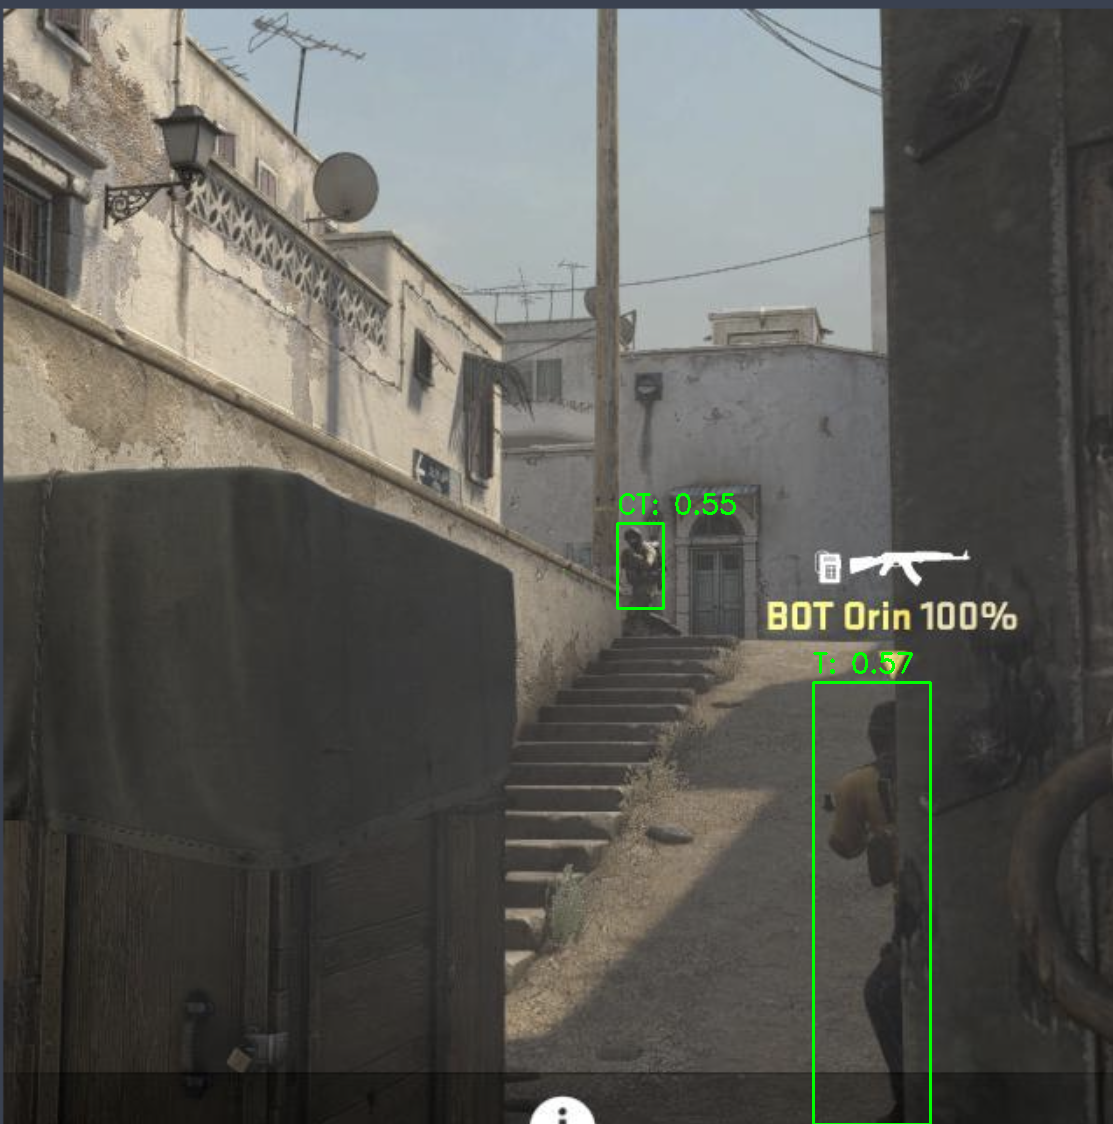

In [ ]:
predict_image('csgo4.png')